<a href="https://colab.research.google.com/github/teffakin/hw/blob/main/Heart_Stroke_Prediction_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
import warnings
pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [ ]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


# EDA

In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\teffa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


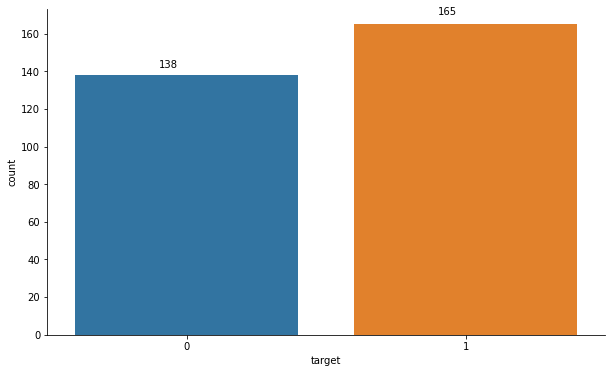

In [ ]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

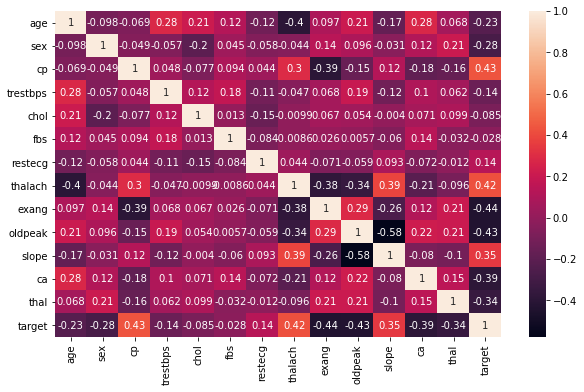

In [ ]:
sns.heatmap(df.corr(), annot=True);

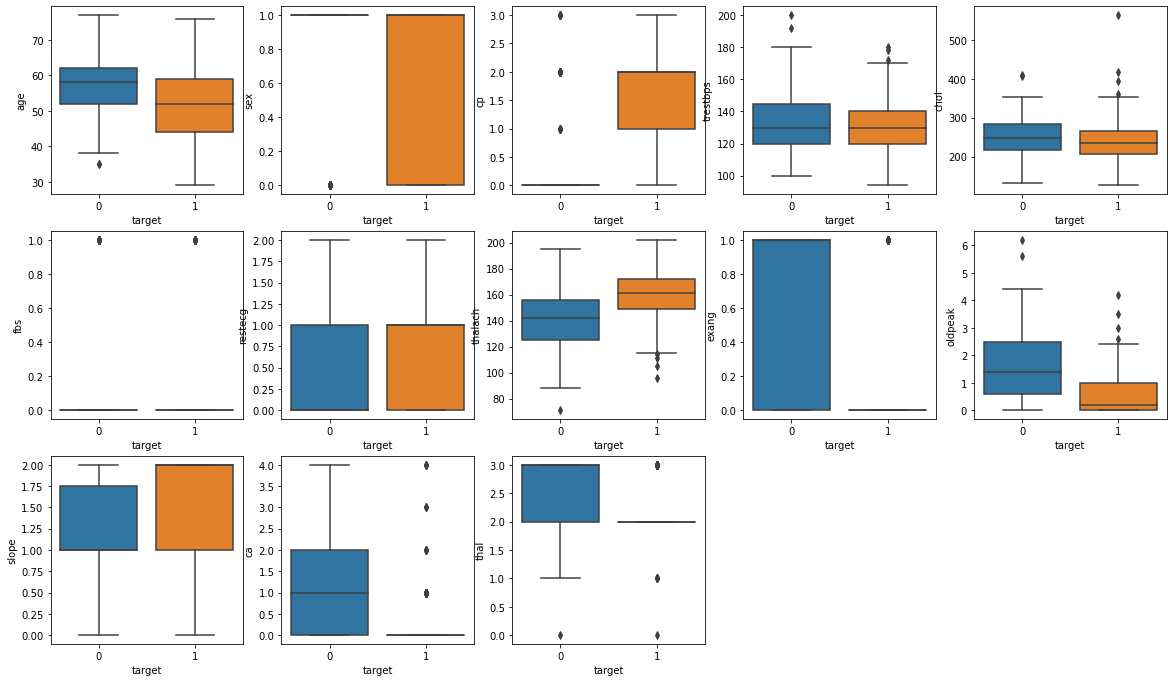

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x = 'target', y = feature, data = df)


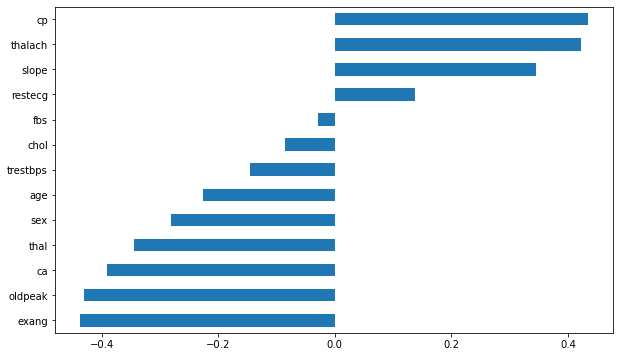

In [ ]:
df.corr()["target"].drop("target").sort_values().plot.barh();


# Data Preprocessing

In [ ]:
X = df.drop('target',axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.97231009, 0.02768991],
       [0.17102381, 0.82897619],
       [0.31666738, 0.68333262],
       [0.05706165, 0.94293835],
       [0.94517392, 0.05482608],
       [0.1640271 , 0.8359729 ],
       [0.10202914, 0.89797086],
       [0.94785969, 0.05214031],
       [0.88030536, 0.11969464],
       [0.22319242, 0.77680758],
       [0.92346026, 0.07653974],
       [0.3753912 , 0.6246088 ],
       [0.91110754, 0.08889246],
       [0.63542722, 0.36457278],
       [0.10301309, 0.89698691],
       [0.27667491, 0.72332509],
       [0.03550222, 0.96449778],
       [0.32499826, 0.67500174],
       [0.24571371, 0.75428629],
       [0.93893583, 0.06106417],
       [0.96275468, 0.03724532],
       [0.349577  , 0.650423  ],
       [0.44692902, 0.55307098],
       [0.26518983, 0.73481017],
       [0.48315305, 0.51684695],
       [0.07645178, 0.92354822],
       [0.94039295, 0.05960705],
       [0.19451839, 0.80548161],
       [0.93176449, 0.06823551],
       [0.8607522 , 0.1392478 ],
       [0.

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0


In [ ]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.028
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.829
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.683
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.943
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.154
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1,0.979
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0.039
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0,0.115


In [ ]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.028,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.829,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.683,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.943,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.154,0
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1,0.979,1
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0.039,0
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0,0.115,0


In [ ]:
test_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.943,1
158,58,1,1,125,220,0,1,144,0,0.400,1,4,3,1,0.139,0
265,66,1,0,112,212,0,0,132,1,0.100,2,1,2,0,0.251,0
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1,0.979,1
19,69,0,3,140,239,0,1,151,0,1.800,2,2,2,1,0.897,1


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  8]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[23,  8],
       [ 2, 28]], dtype=int64)

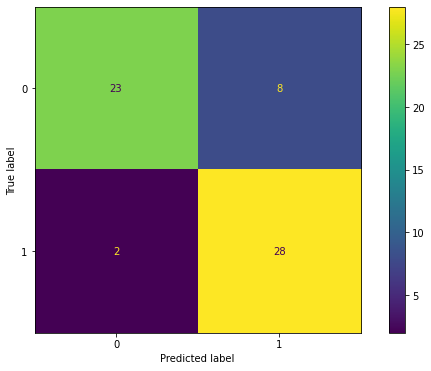

In [ ]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

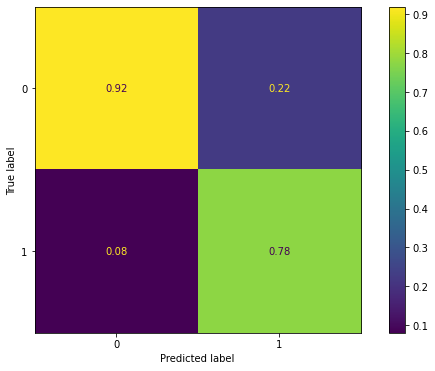

In [ ]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.006,0.002,0.800,0.846,0.786,0.815
2,0.004,0.002,0.840,0.812,0.929,0.867
3,0.006,0.003,0.833,0.812,0.929,0.867
4,0.006,0.002,0.750,0.722,0.929,0.813
5,0.005,0.002,0.875,0.923,0.857,0.889
6,0.005,0.002,0.792,0.833,0.769,0.800
7,0.005,0.002,0.792,0.786,0.846,0.815
8,0.004,0.002,0.708,0.688,0.846,0.759
9,0.005,0.002,0.792,0.750,0.923,0.828
10,0.005,0.002,1.000,1.000,1.000,1.000


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.818
test_precision   0.817
test_recall      0.881
test_f1          0.845
dtype: float64

In [ ]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61

Train Set

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       107
           1       0.82      0.91      0.86       135

    accuracy                           0.84       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.84      0.84       242



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


In [ ]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train_scaled,y_train)

C:\Users\teffa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77087912        nan 0.80054945 0.83681319 0.82912088
 0.83681319 0.83681319        nan 0.85989011        nan 0.88076923
 0.91813187 0.89615385 0.91813187 0.91813187        nan 0.81428571
        nan 0.80659341 0.84450549 0.83681319 0.84450549 0.84450549
        nan 0.88131868        nan 0.8510989  0.9032967  0.88901099
 0.9032967  0.9032967         nan 0.81373626        nan 0.82857143
 0.85164835 0.85164835 0.85164835 0.85164835        nan 0.85824176
        nan 0.86538462 0.8956044  0.88846154 0.8956044  0.8956044
        nan 0.83626374        nan 0.85824176 0.85164835 0.84395604
 0.85164835 0.85164835        nan 0.86593407        nan 0.87307692
 0.88846154 0.88131868 0.88846154 0.88846154        nan 0.84340659
        nan 0.84340659 0.84395604 0.83681319 0.84395604 0.84395604
        nan 0.85879121        nan 0.87362637 0.8741758

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [ ]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21 10]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.76        31
           1       0.73      0.90      0.81        30

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.78        61
weighted avg       0.80      0.79      0.78        61


Train_Set
[[ 77  30]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       107
           1       0.81      0.93      0.86       135

    accuracy                           0.83       242
   macro avg       0.85      0.82      0.83       242
weighted avg       0.84      0.83      0.83       242



# Implement KNN and Evaluate

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

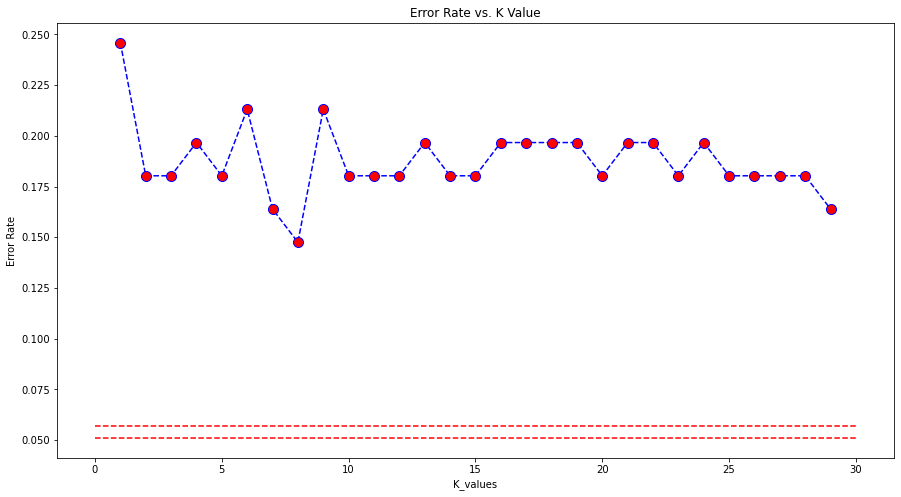

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set
[[21 10]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        31
           1       0.71      0.83      0.77        30

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set
[[107   0]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       135

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set
[[24  7]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.80      0.79        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 89  18]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       107
           1       0.87      0.87      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [ ]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.004,0.800,0.800,0.857,0.828
2,0.001,0.004,0.720,0.733,0.786,0.759
3,0.001,0.003,0.833,0.857,0.857,0.857
4,0.001,0.006,0.833,0.812,0.929,0.867
5,0.001,0.004,0.792,0.800,0.857,0.828
6,0.001,0.003,0.667,0.692,0.692,0.692
7,0.001,0.003,0.833,0.800,0.923,0.857
8,0.000,0.004,0.667,0.647,0.846,0.733
9,0.002,0.003,0.750,0.706,0.923,0.800
10,0.001,0.004,0.917,0.923,0.923,0.923


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.781
test_precision   0.777
test_recall      0.859
test_f1          0.814
dtype: float64

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values= range(1,50)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'recall')

In [ ]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 33, 'p': 1, 'weights': 'distance'}

In [ ]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[23  8]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


Train_Set
[[107   0]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       135

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# Visually compare models based on your chosen metric

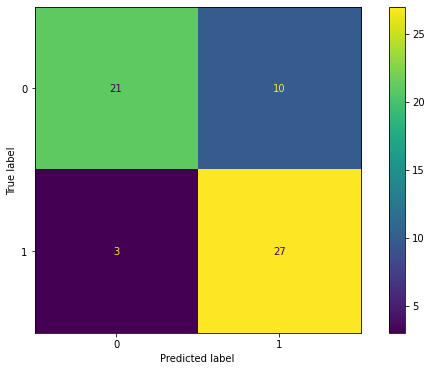

In [ ]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

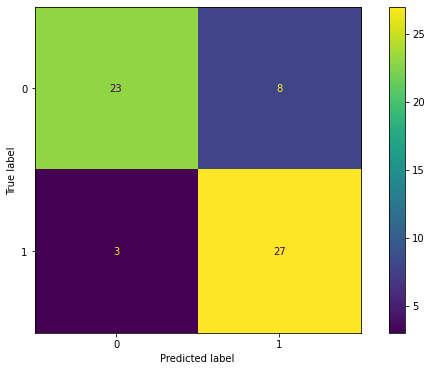

In [ ]:
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test);

# Chose best model and make a random prediction 

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_knn_model = KNeighborsClassifier(n_neighbors=33)

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3


In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000


In [ ]:
new_obs = {"age": [43,51,37,56,65],
           "sex": [1,1,0,1,0],
           "cp": [4,1,0,0,3],
           "trestbps": [145,152,160,130,145],
           "chol": [380,250,275,312,200],
           "fbs": [0,1,0,1,0],
           "restecg": [1,1,2,0,0],
           "thalach": [132,167,146,180,190],
           "exang": [1,0,1,0,1],
           "oldpeak": [0.1,2.4,3.3,5.7,6.1],
           "slope": [0,2,2,1,0],
           "ca": [0,3,2,1,3],
           "thal": [3,1,2,0,1]               
           
           
          }

In [ ]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,43,1,4,145,380,0,1,132,1,0.100,0,0,3
1,51,1,1,152,250,1,1,167,0,2.400,2,3,1
2,37,0,0,160,275,0,2,146,1,3.300,2,2,2
3,56,1,0,130,312,1,0,180,0,5.700,1,1,0
4,65,0,3,145,200,0,0,190,1,6.100,0,3,1


In [ ]:
samples_scaled = scaler.transform(samples)
samples_scaled

array([[0.29166667, 1.        , 1.33333333, 0.48113208, 0.57990868,
        0.        , 0.5       , 0.46564885, 1.        , 0.01612903,
        0.        , 0.        , 1.        ],
       [0.45833333, 1.        , 0.33333333, 0.54716981, 0.28310502,
        1.        , 0.5       , 0.73282443, 0.        , 0.38709677,
        1.        , 0.75      , 0.33333333],
       [0.16666667, 0.        , 0.        , 0.62264151, 0.34018265,
        0.        , 1.        , 0.57251908, 1.        , 0.53225806,
        1.        , 0.5       , 0.66666667],
       [0.5625    , 1.        , 0.        , 0.33962264, 0.42465753,
        1.        , 0.        , 0.83206107, 0.        , 0.91935484,
        0.5       , 0.25      , 0.        ],
       [0.75      , 0.        , 1.        , 0.48113208, 0.16894977,
        0.        , 0.        , 0.90839695, 1.        , 0.98387097,
        0.        , 0.75      , 0.33333333]])

In [ ]:
final_knn_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
predictions = final_knn_model.predict(samples_scaled)
predictions_proba = final_knn_model.predict_proba(samples_scaled)

In [ ]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_1,pred_proba_0
0,43,1,4,145,380,0,1,132,1,0.100,0,0,3,1,0.545,0.455
1,51,1,1,152,250,1,1,167,0,2.400,2,3,1,1,0.545,0.455
2,37,0,0,160,275,0,2,146,1,3.300,2,2,2,0,0.364,0.636
3,56,1,0,130,312,1,0,180,0,5.700,1,1,0,0,0.455,0.545
4,65,0,3,145,200,0,0,190,1,6.100,0,3,1,0,0.485,0.515
